## Chung Yan Chan (2260810)--- Dataset 1: Forest Fires

# Interesting question: Determining whether there is forest fire within a region in Algeria.

# 1) Introduction: 
In recent year, forest fire become a concerned envirnomental problem, where predicting the severity of the forest fire is a key problem to evaluate how bad of forest fire is it for the envirnoment.  It is benefictial to the governments to have defensive measures. For instance, increasing the manpower of firemen.

Therefore, 2 types of supervised learning problems are involved in this report, which are classification and regression. The first type is classification, which is used for predicting or classifying  the discreted value. Classification is a process that finding a function, it divides the dataset into classes accroding to various parameters. The training dataset does the training in classification is used to categorize the data to various classes (JavaTpoint,n.d.). Another type is regression, which is modelling the relationship of an input variable and one or more output variables (ListenData,n.d.).

This report is going to use decision tree classification model and linear regression model to check the accuracy of the models. Also, doing the comparation of these two models and finding the most fitted model. 

# 2) Data Description and Exploratory Analysis
This report is using the Algerian Forest Fires Dataset Data Set (UCI, 2019). The data set is going to split to 2 parts. One of the part is the following 12 features which is stored as training data. Another part is 'Classes' which is stored as testing data, it aimed to test fire or not fire. 

12 features:
1)day
2)month
3)temp:temperature noon (temperature max) in Celsius degrees
4)RH: Relative Humidity
5)Ws: Wind speed
6)Rain
7)FFMC: Fine Fuel Moisture Code (FFMC)
8)DMC: Duff Moisture Code (DMC)
9)DC: Drought Code (DC)
10)ISI: Initial Spread Index (ISI) 
11)BUI: Buildup Index (BUI)
12)FWI: Fire Weather Index (FWI) 
13)Classes

1 Target(2 classes):
1)fire
2)notfire


In [154]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as mtp

#sklearn
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

Loading the data:
Reading the 'ForestFire.csv' and then adding features as header into the table. 

In [124]:
#Load dataset
df= pd.read_csv("ForestFire.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,notfire
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire


In [125]:
#Add header into the table
df.columns=['day', 'month', 'temp','RH', 'Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Classes']
df

,day,month,temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,notfire
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   day      243 non-null    int64  
 1   month    243 non-null    int64  
 2   temp     243 non-null    int64  
 3   RH       243 non-null    int64  
 4   Ws       243 non-null    int64  
 5   Rain     243 non-null    float64
 6   FFMC     243 non-null    float64
 7   DMC      243 non-null    float64
 8   DC       243 non-null    float64
 9   ISI      243 non-null    float64
 10  BUI      243 non-null    float64
 11  FWI      243 non-null    float64
 12  Classes  243 non-null    object 
dtypes: float64(7), int64(5), object(1)
memory usage: 24.8+ KB


In [126]:
# Extract input and out data from the dataframe:

#Input 
feature_frame = df.drop(['Classes'], axis = 1)

#Output
label_frame = df['Classes']


Statistical analysis of dataset:

In [127]:
feature_frame.describe ()

,day,month,temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


'x_train, x_test' is passing the 'feature_frame' data to the train_test_split function with different parameters to investigate in the documentation. 'y_train, y_test' is also using the same process with the 'label_frame' data.'random_state =104' parameter is an controlling randomization object when splitting.'test_size' is defined a 20% test size, which means randomly to pick 20% of the data for testing and the rest of 80% would be kept for training.Also, it is against overfitting. Moreover,the shuffle parameter is a boolean object. 'shuffle = True' is used to determine shuffling the dataset before applying in splitting data (Python,2023).

In [128]:
# split the data into train-test sets
x_train, x_test = train_test_split(feature_frame, random_state = 100, 
test_size = 0.20, shuffle = True)

y_train, y_test = train_test_split(label_frame, random_state = 100,
test_size = 0.20, shuffle = True)


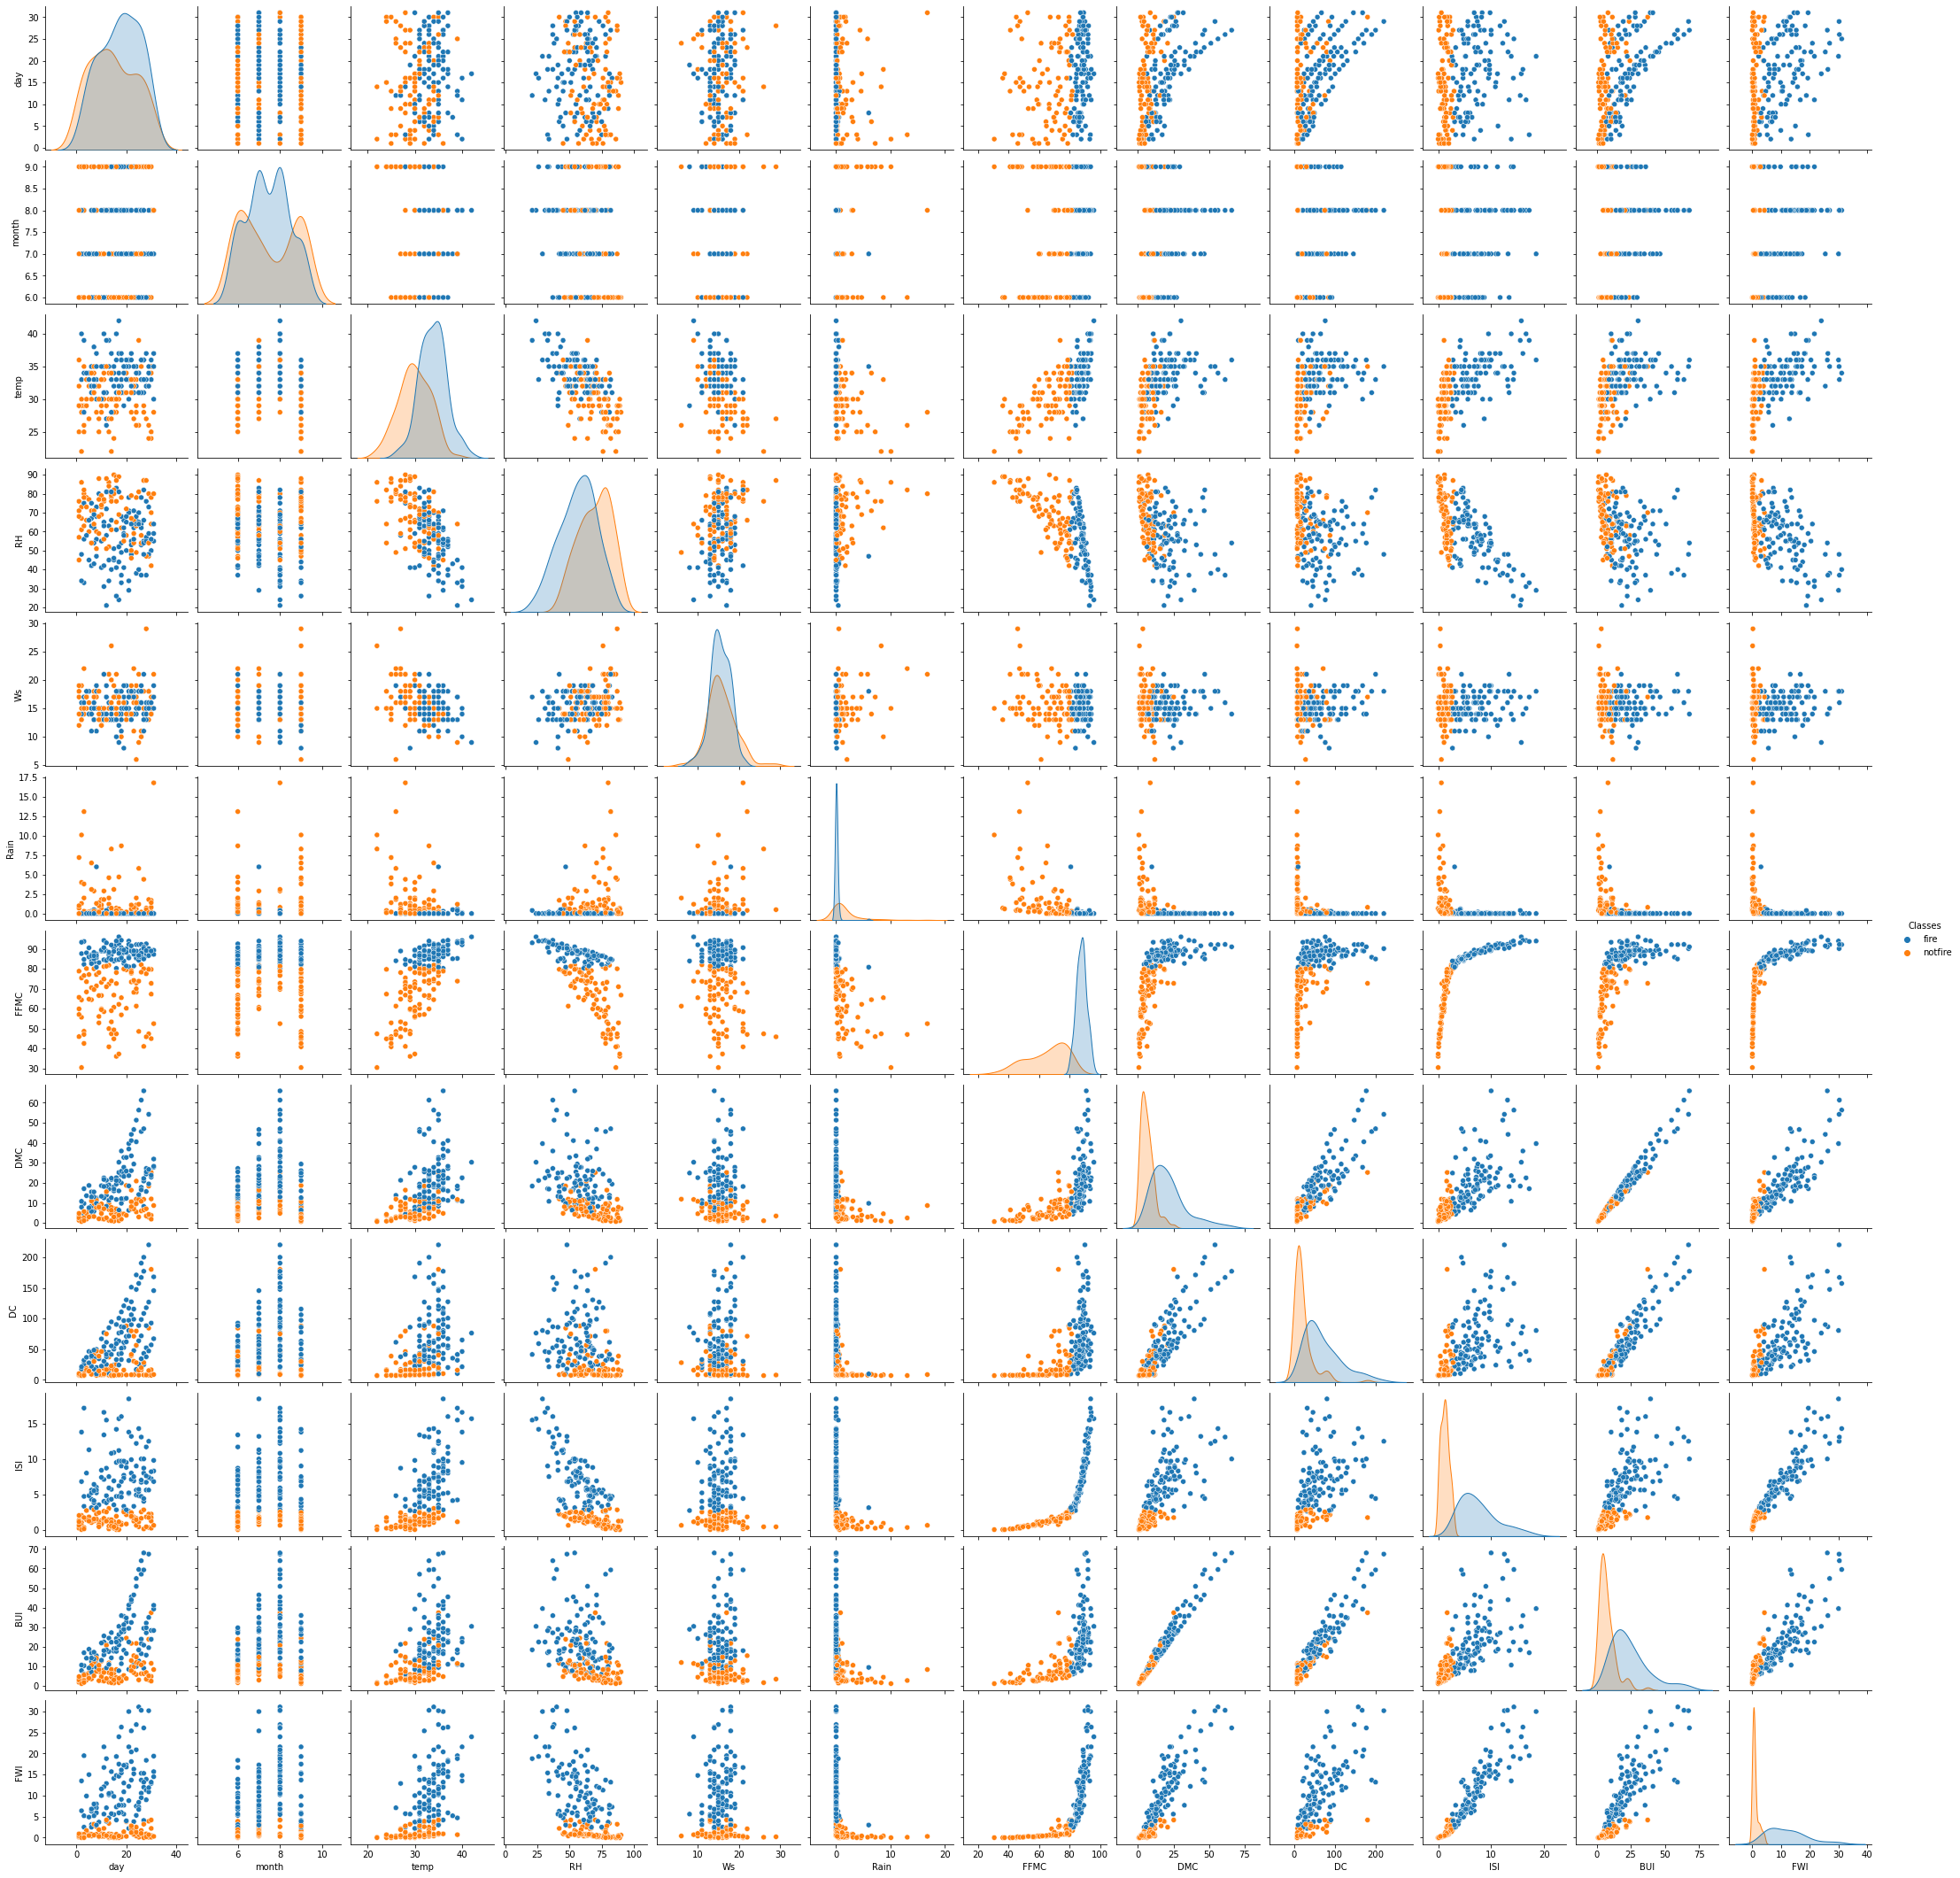

In [129]:
# Visualise the scatterplot matrix: training data
train_df = pd.concat([x_train,y_train],axis=1)

sns.pairplot(data = train_df,hue = 'Classes')

plt.show()

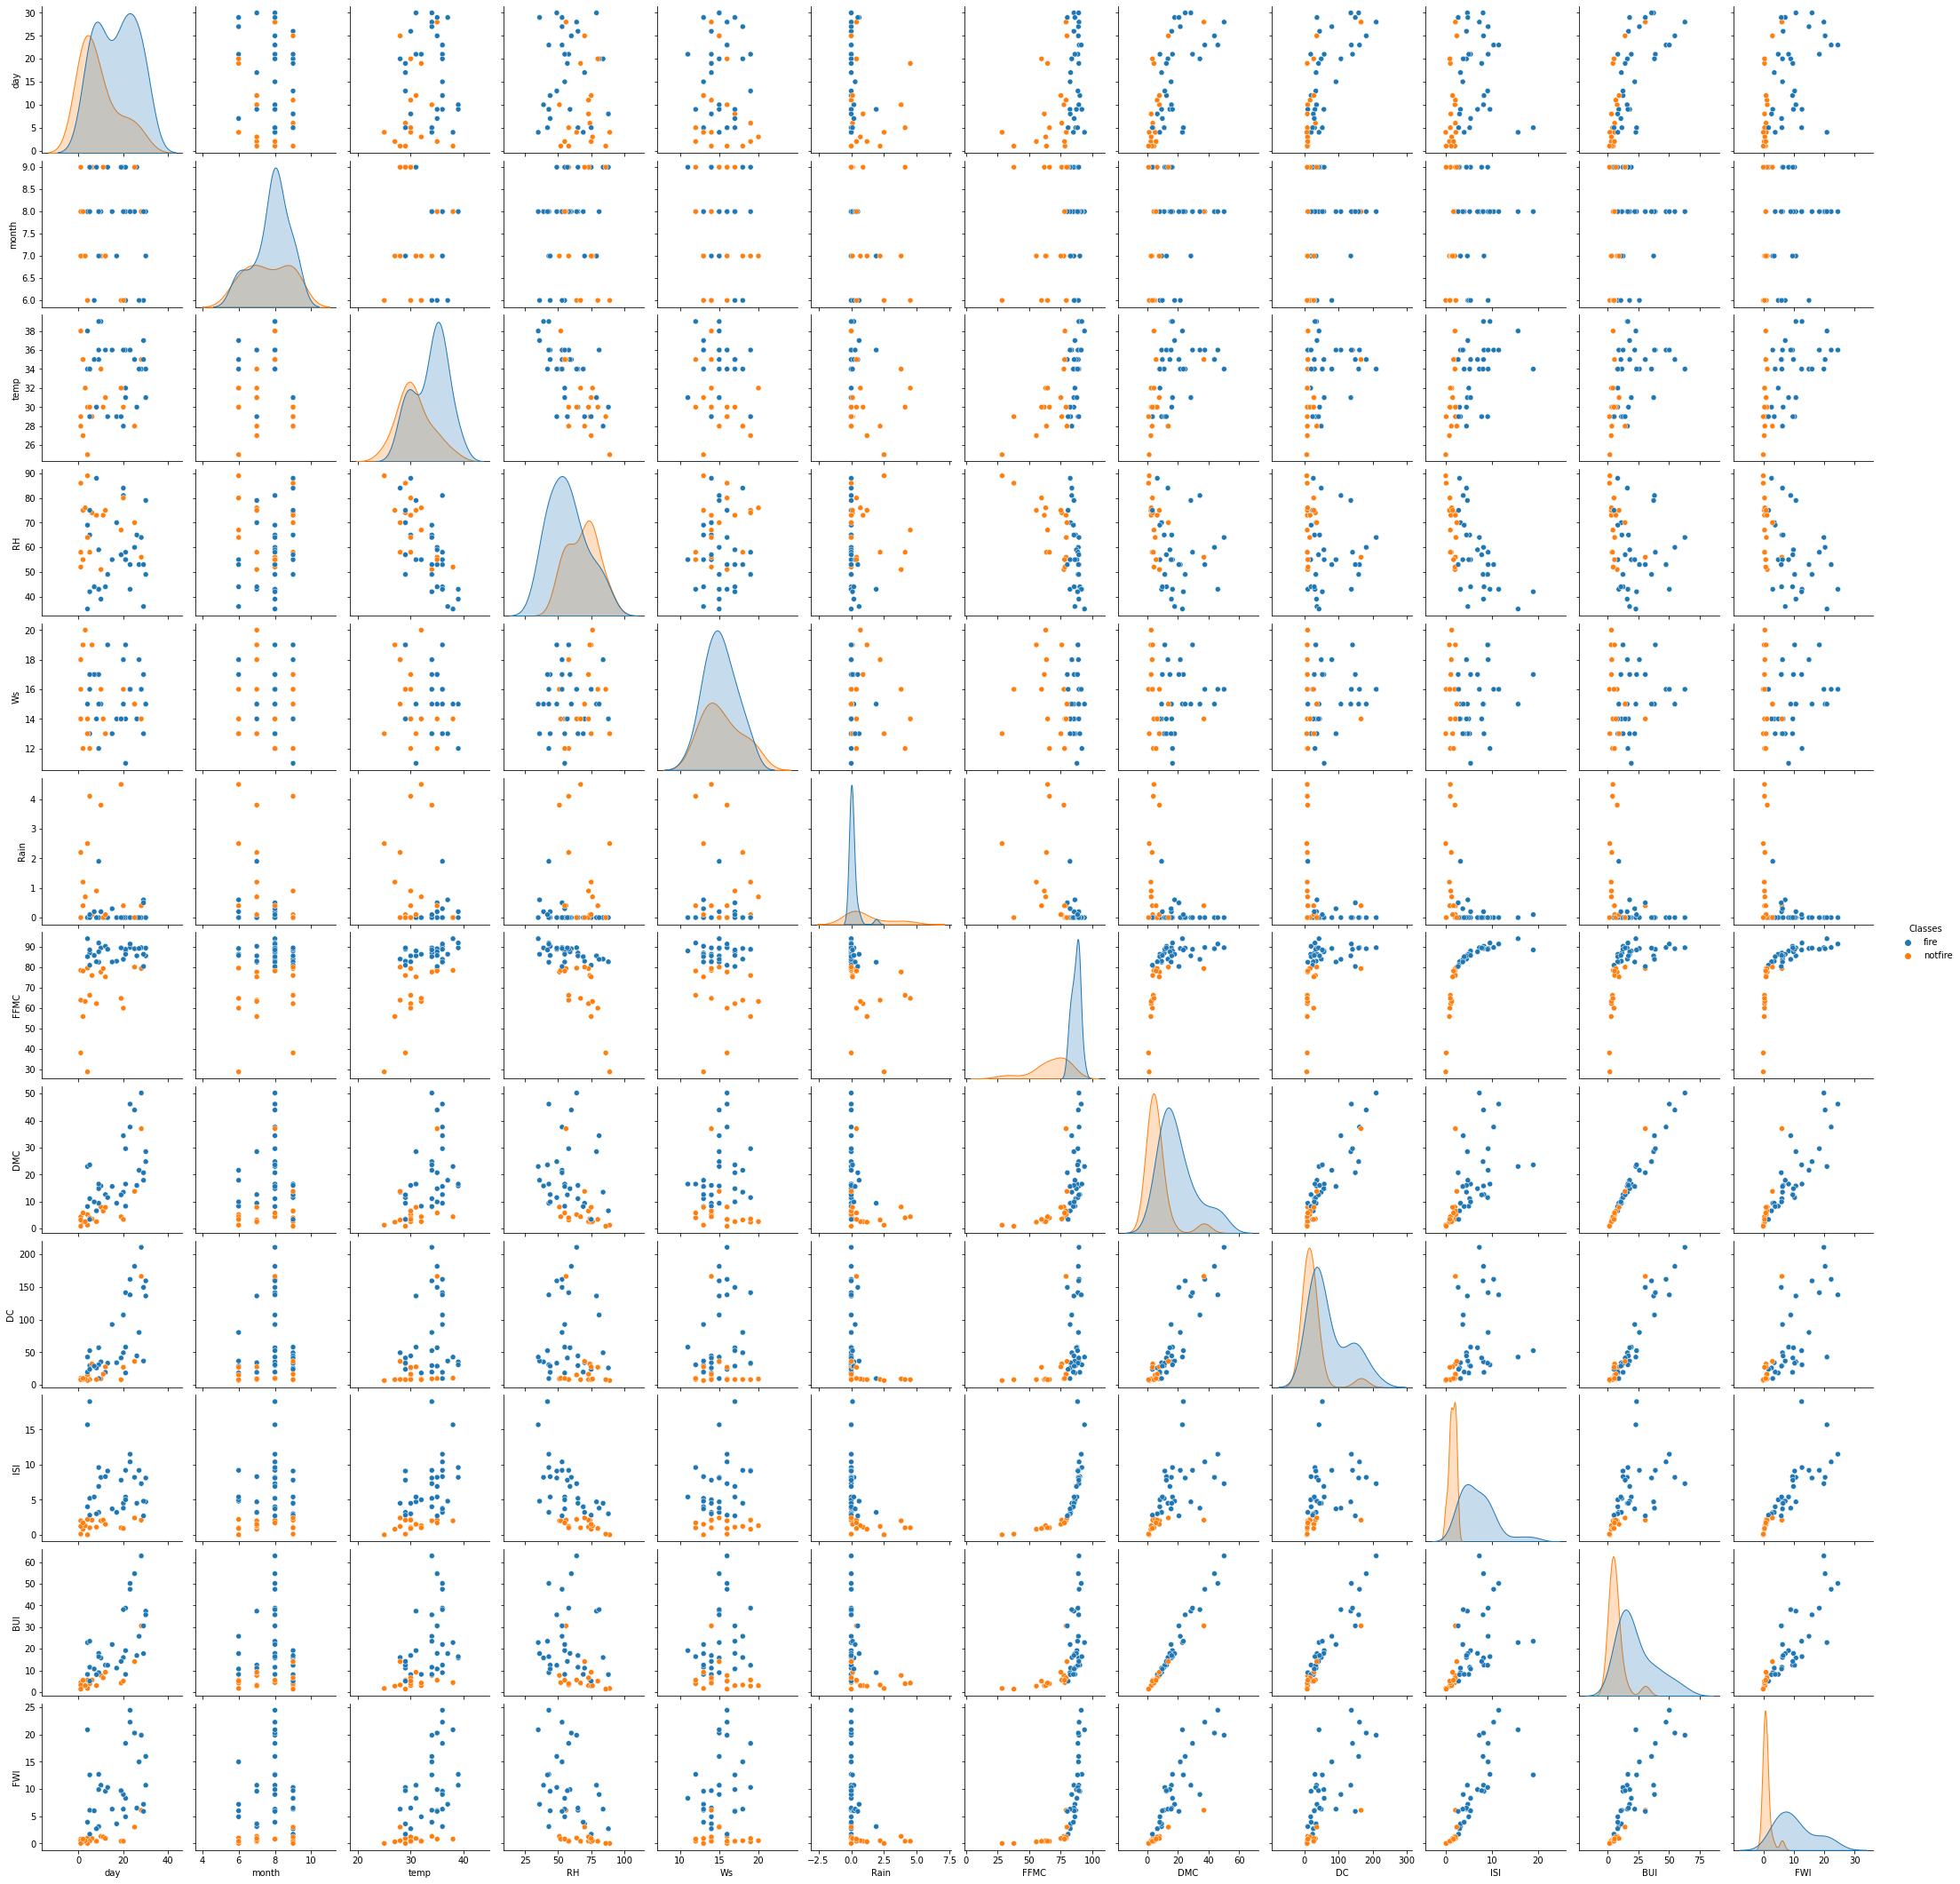

In [130]:
# Visualise the scatterplot matrix: testing data
test_df=pd.concat([x_test,y_test],axis=1)

sns.pairplot(data = test_df,hue = 'Classes')

plt.show()

Standardise the original data:
Standardising the features by using the mean() function and std() function of the feature_frame variable, calculating: ( 𝑋−𝑋𝑚𝑒𝑎𝑛/𝑋𝑠𝑡𝑑), where 𝑋 is feature_frame. This is stored in 'standard_feature_frame'.Then, producing a SPloM for the standardised data by using sns.pairplot() function. 

In [131]:
standardised_feature_frame = (feature_frame - feature_frame.mean())/feature_frame.std()
standardised_feature_frame

,day,month,temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,-1.669350,-1.347387,-0.868861,-0.339972,0.891437,-0.380871,-0.846181,-0.910241,-0.877590,-0.828645,-0.934084,-0.878346
1,-1.556261,-1.347387,-0.868861,-0.070215,-0.887046,0.268089,-0.936775,-0.853758,-0.877590,-0.900861,-0.898943,-0.891786
2,-1.443171,-1.347387,-1.695754,1.346010,2.314223,6.158644,-2.142380,-0.982863,-0.888080,-1.069364,-0.983281,-0.932105
3,-1.330082,-1.347387,-1.971385,1.818084,-0.887046,0.867128,-3.431611,-1.079691,-0.892276,-1.141579,-1.053563,-0.945545
4,-1.216992,-1.347387,-1.420123,1.008813,0.180044,-0.380871,-0.908900,-0.942518,-0.739125,-0.852717,-0.898943,-0.878346
...,...,...,...,...,...,...,...,...,...,...,...,...
238,1.157888,1.343695,-0.593230,0.199542,-0.531349,-0.380871,0.526676,0.106458,-0.103447,-0.058347,0.014722,-0.071956
239,1.270977,1.343695,-1.144492,1.683206,-0.175653,1.815607,-2.560509,-0.660101,-0.869198,-1.117507,-0.737294,-0.945545
240,1.384067,1.343695,-1.420123,1.683206,4.804099,-0.131271,-2.226006,-0.902172,-0.871296,-1.045292,-0.934084,-0.918665
241,1.497156,1.343695,-2.247016,-0.542289,0.891437,-0.330951,0.129454,-0.837620,-0.718146,-0.732358,-0.814604,-0.851466


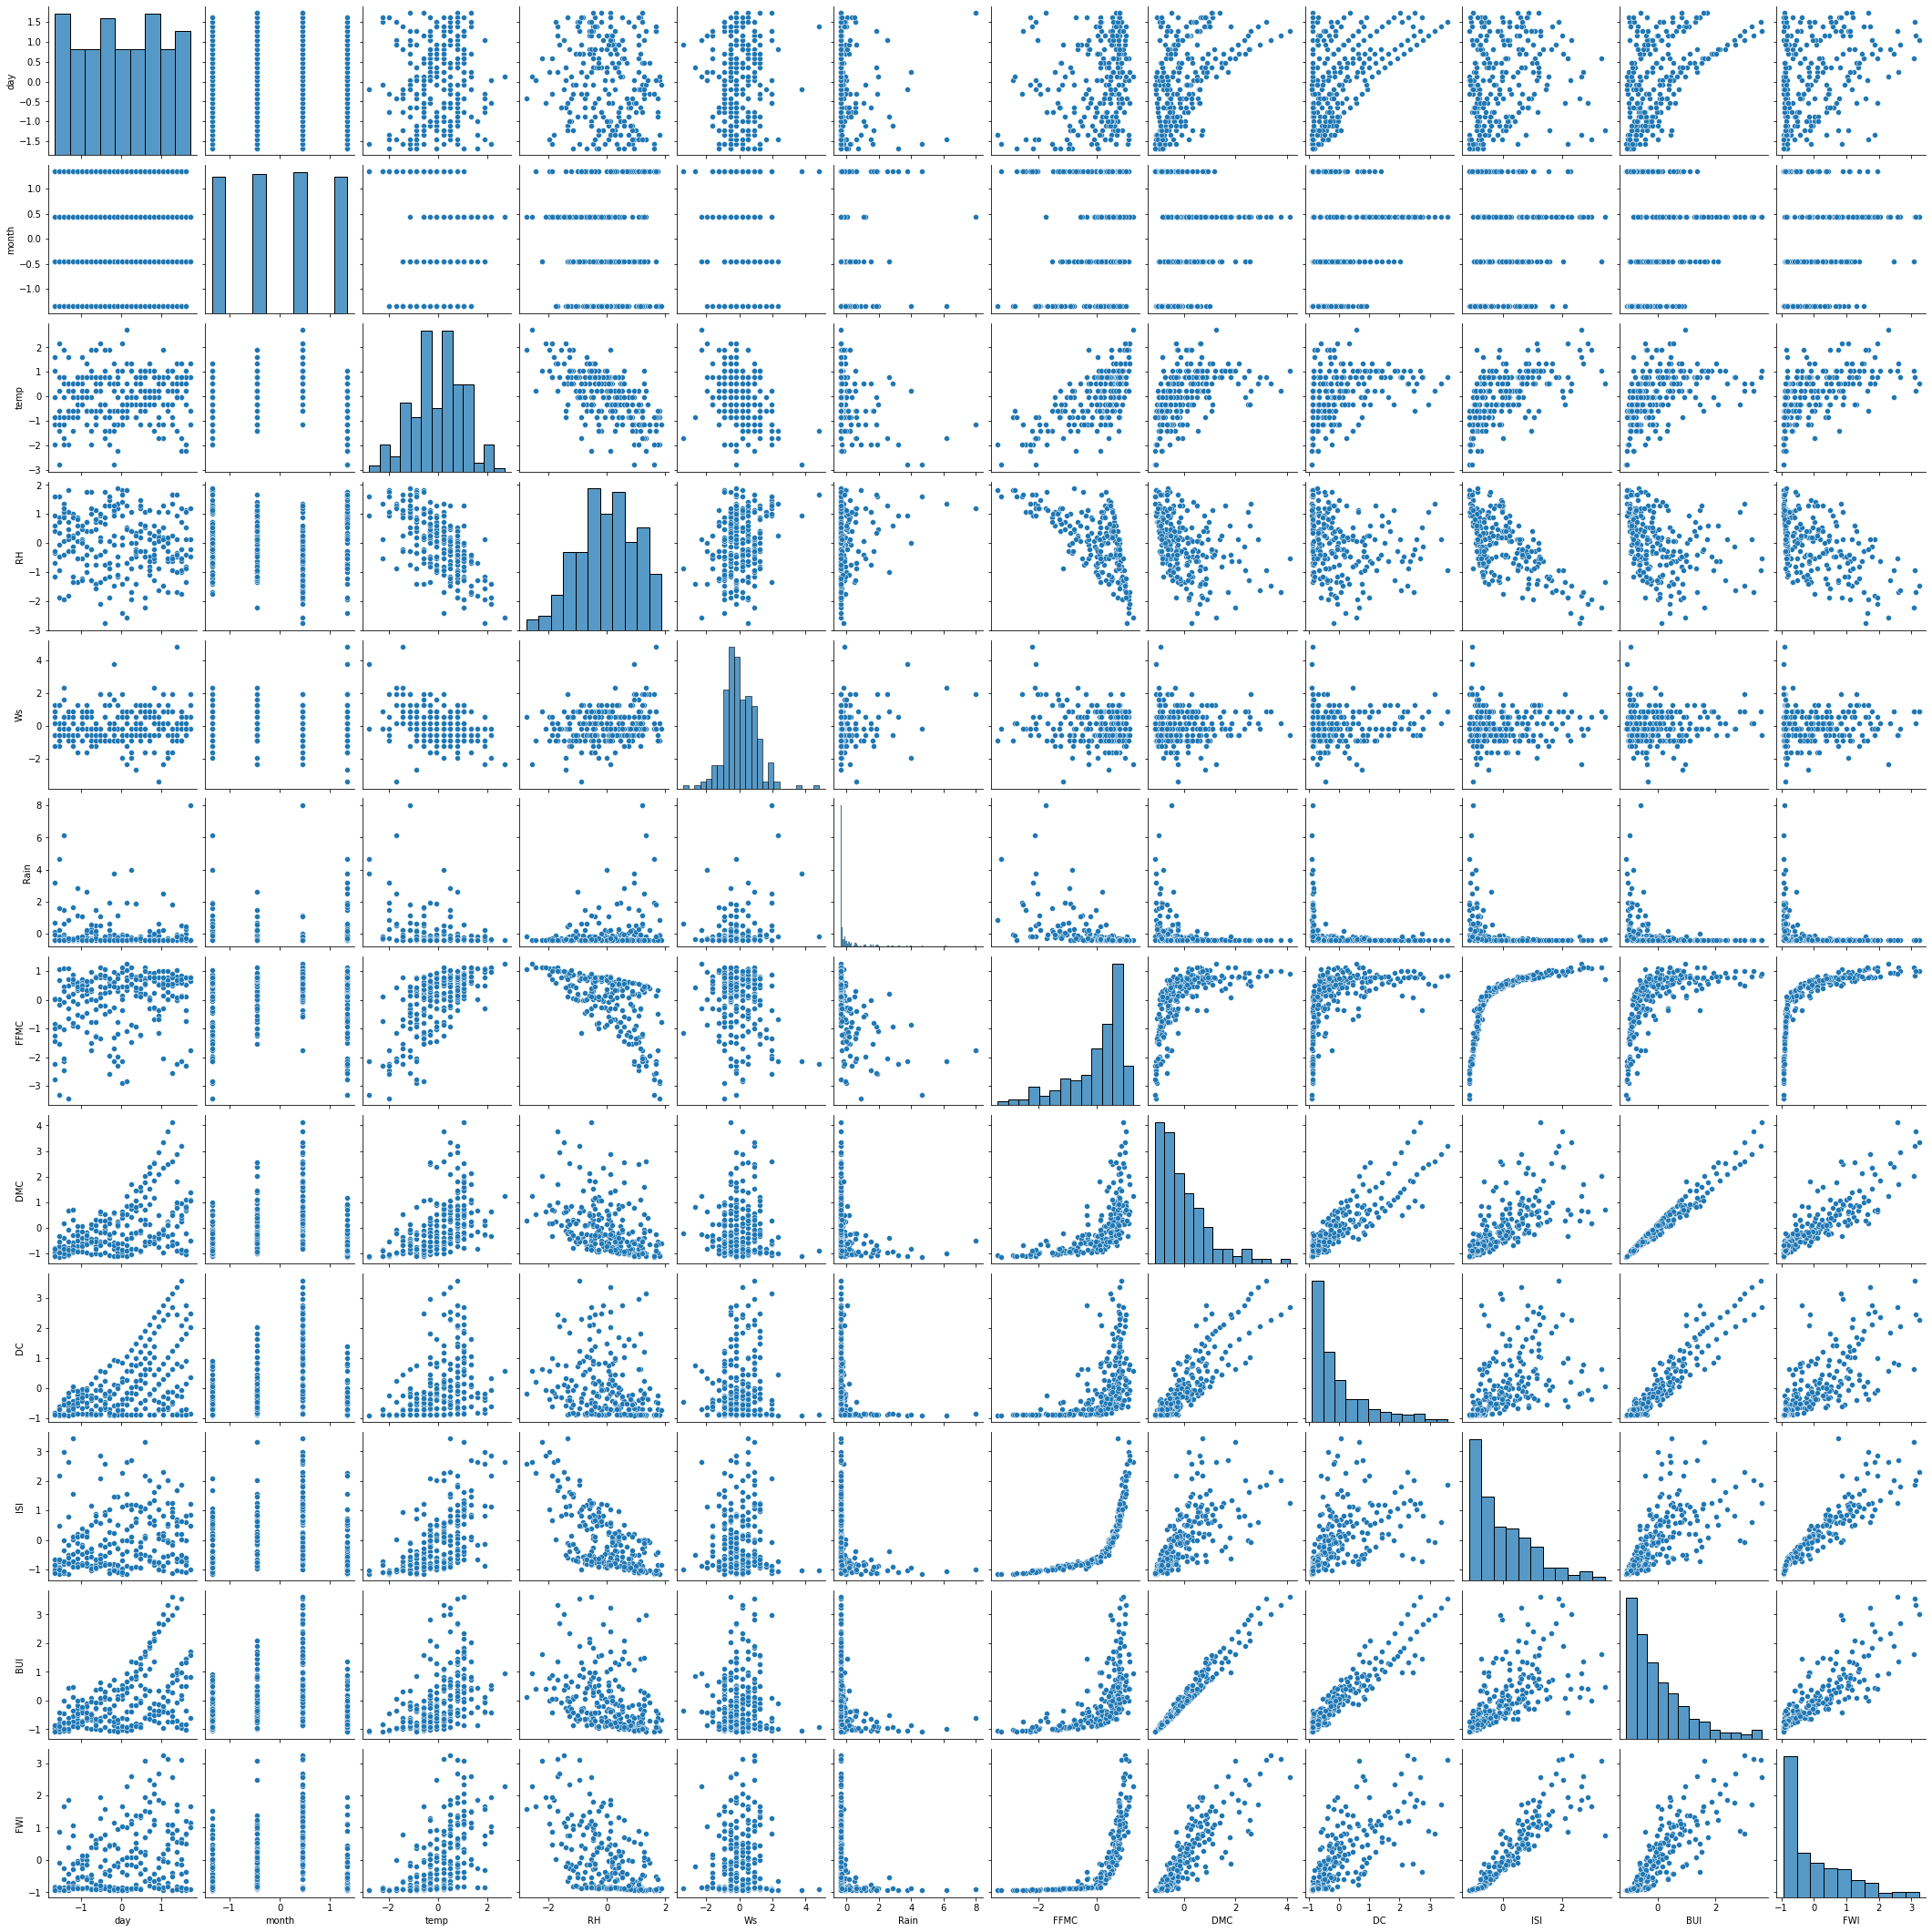

In [30]:
sns.pairplot(standardised_feature_frame)

# 3) Build the models
# a)Decision Tree Classification Model
Decision tree algorithm is good at solving classification problem but it also can applied in regression. A decision tree is a mechanical approach for making a decision through forking input into smaller decisions. The decision tree contains 2 types of nodes (head, leaves) and branches. The head node is the decision node. The leaves are the output which are splitted from the head node with branches.  The tree-like structure is constructed from the root node and the expanded various branches. (Nanfack, et al., 2022)

Step 1: Creating a Decision Tree
Instantiating the DecisionTreeClassifier() class from sklearn.tree.DecisionTreeClassifier for creating a object of classifier model. After building the classifier, using the .fit() function to fit the above model to the training data.  

In [132]:
#Create Decision Tree classifer object
clf = DecisionTreeClassifier()

#fit model to data --optimise error function
clf = clf.fit(x_train, y_train)


Step 2: Visualising and Inspecting Decision Trees
.export_text() function builds a text report to show the extracted and trained tree and stored in 'text_representation'. Then, print the tree out. The trained tree can accurately identify how the decision  would be make through the given data point. 

In [137]:
# visualise the tree by printing the string returned by the model's export_tree method.
text_representation = tree.export_text(clf, feature_names = list(x_train.columns))
print(text_representation)


|--- ISI <= 3.05
|   |--- FFMC <= 80.15
|   |   |--- class: notfire
|   |--- FFMC >  80.15
|   |   |--- day <= 14.50
|   |   |   |--- class: notfire
|   |   |--- day >  14.50
|   |   |   |--- FWI <= 1.95
|   |   |   |   |--- class: notfire
|   |   |   |--- FWI >  1.95
|   |   |   |   |--- class: fire
|--- ISI >  3.05
|   |--- class: fire



Step 3: Explain how the tree is being used
Printing 'x_test.iloc[[0]]' to get the first sample of the test dataset. Next, using the .predict() function to make the prediction for the first sample and then printing it out. After that, using the .prediction() function again to show all the prediction result. 

In [138]:
# prediction for the first test input array
print(x_test.iloc[[0]])

y_pred_first = clf.predict(x_test.iloc[[0]])

print('\n','Outcome prediction: ')
print(y_pred_first)

# make predictions using the ind and scaled test data
print('\n')
print('Outcome prediction for test: ')
y_pred = clf.predict(x_test)
print(y_pred)

# tell us how this decision was reached using the tree

    day  month  temp  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI
65    5      8    34  65  13   0.0  86.8  11.1  29.7  5.2  11.5  6.1

 Outcome prediction: 
['fire']


Outcome prediction for test: 
['fire' 'fire' 'fire' 'fire' 'fire' 'notfire' 'fire' 'fire' 'notfire'
 'fire' 'fire' 'notfire' 'fire' 'fire' 'fire' 'notfire' 'fire' 'notfire'
 'fire' 'fire' 'fire' 'fire' 'fire' 'notfire' 'notfire' 'fire' 'fire'
 'notfire' 'notfire' 'fire' 'fire' 'notfire' 'notfire' 'fire' 'notfire'
 'notfire' 'fire' 'notfire' 'notfire' 'notfire' 'fire' 'fire' 'fire'
 'notfire' 'fire' 'notfire' 'notfire' 'fire' 'notfire']


Step 4: Confusion Matrix and Accuracy
Due to simply training a model is not sufficient to confirm the predictions, using the confusion_matrix( ) function and ConfusionMatrixDisplay( ) function to evaluate the prediction with the existing data, it may generate the predictions for the unseen data. Then, using disp.plot() function and plt.show() function to show the figure of classification performance. After that, using accuracy_score() to show the accuracy of doing the prediction.

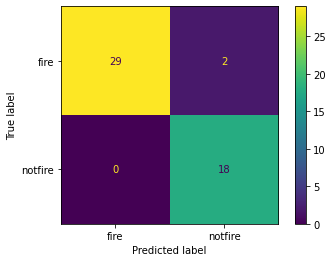

0.9591836734693877

In [139]:
# report confusion matrix and accuracy

# visualise the confusion matrix with ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=clf.classes_)

disp.plot()
plt.show()
# what is the accuracy on the testing set?
accuracy_score(y_test, y_pred)



# b) Linear Regression Model
The linear regression is a simple regression model. It modelling the relationship of dependent variables and independent variables. The case of the simple linear regression, it involves one input variable and one outpur variable(Acharya, 2019).


Step 1: Create a PCA model to fit to the data
Creating a Principle Component Analysis model to call the constructor for the PCA class and assign the created object into a variable by using sklearn’s PCA implementation.

In [156]:
pca_model = PCA(standardised_feature_frame)
pca_model

PCA(n_components=          day     month      temp        RH        Ws      Rain      FFMC  \
0   -1.669350 -1.347387 -0.868861 -0.339972  0.891437 -0.380871 -0.846181   
1   -1.556261 -1.347387 -0.868861 -0.070215 -0.887046  0.268089 -0.936775   
2   -1.443171 -1.347387 -1.695754  1.346010  2.314223  6.158644 -2.142380   
3   -1.330082 -1.347387 -1.971385  1.818084 -0.887046  0.867128 -3.431611   
4   -1.216992 -1.347387 -1.420123  1.008813  0.180044 -0.380871 -0.908...
3   -1.079691 -0.892276 -1.141579 -1.053563 -0.945545  
4   -0.942518 -0.739125 -0.852717 -0.898943 -0.878346  
..        ...       ...       ...       ...       ...  
238  0.106458 -0.103447 -0.058347  0.014722 -0.071956  
239 -0.660101 -0.869198 -1.117507 -0.737294 -0.945545  
240 -0.902172 -0.871296 -1.045292 -0.934084 -0.918665  
241 -0.837620 -0.718146 -0.732358 -0.814604 -0.851466  
242 -0.877965 -0.690873 -0.852717 -0.835689 -0.878346  

[243 rows x 12 columns])

Step 2: Fit the model to the data
Using the fit() function to fit the pca model to the dataset and passing in the standardised feature frame as input.

In [157]:
pca_model = PCA(n_components = 12) 
pca_model.fit(standardised_feature_frame)


PCA(n_components=12)

Step 3: Using the fitted model to transform the data from standardised feature space into principle component space
Transforming the dataset by using transform( ) function, passing in the standardised feature frame as input. This will put your data into the principle component space and it will still be 12-D,it stored in 'pca_transformed_frame'.

In [158]:
x_pca_model = pca_model.transform(standardised_feature_frame)

Step 4: Visualising the first two components of the principle component space with a scatter plot.
Creating two scatter plots.The first plot plots the first two features of the original features. Where X' is your standardised data.The second plot plots the first two principle components against each other.

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      notfire
1      notfire
2      notfire
3      notfire
4      notfire
        ...   
238       fire
239    notfire
240    notfire
241    notfire
242    notfire
Name: Classes, Length: 243, dtype: object

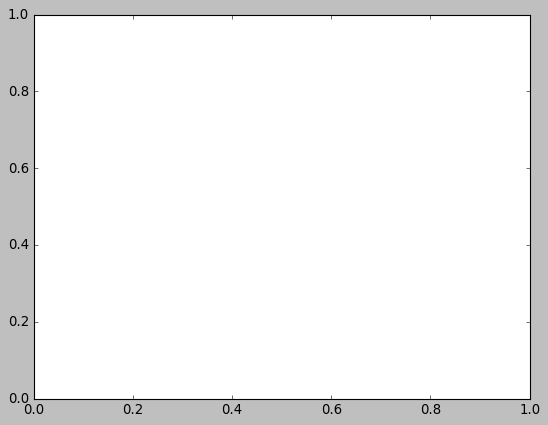

In [159]:
## First Scatter Plot
import matplotlib.pyplot as plt
plt.scatter(standardised_feature_frame['DMC'], standardised_feature_frame['DC'], c=df ['Classes'])
plt.xlabel('Duff Moisture Code')
plt.ylabel('Drought Code')
plt.title('Scatter plot of the Original Features')
plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      notfire
1      notfire
2      notfire
3      notfire
4      notfire
        ...   
238       fire
239    notfire
240    notfire
241    notfire
242    notfire
Name: Classes, Length: 243, dtype: object

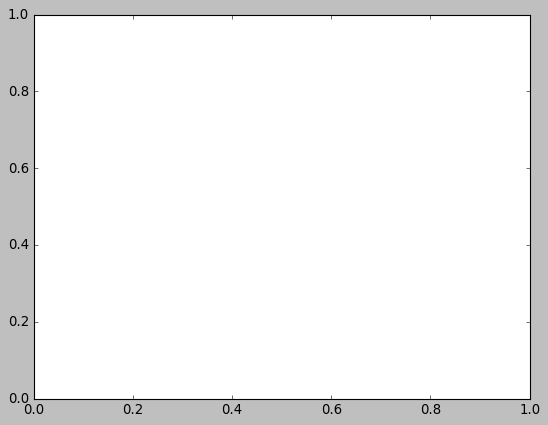

In [160]:
## Second Scatter plot
plt.scatter(x_pca_model[:,0], x_pca_model[:,1], c = df['Classes'])
plt.show()

Step 5: Plot the contribution of each component.
'explained_variance_ratio_' is telling the contribution of each component to explaining the entire set of observations, which is an attribute of pca_model. 
This part is using 'plt.plot(pca_model.explained_variance_ratio_)' to plot the insight. Also,using 'plt.plot(np.cumsum(pca_model.explained_variance_ratio_))' to plot the cummulative sum. 

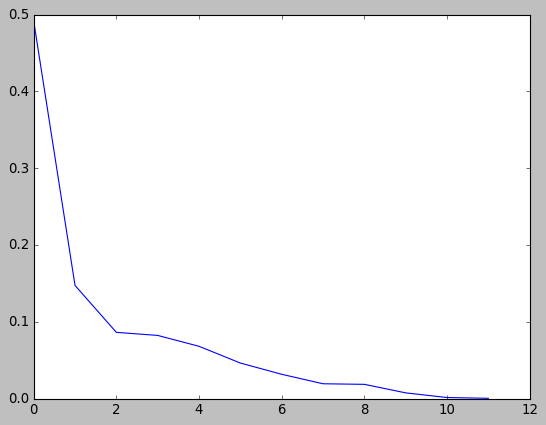

In [161]:
explained_variance_ratio_=plt.plot(pca_model.explained_variance_ratio_)
explained_variance_ratio_

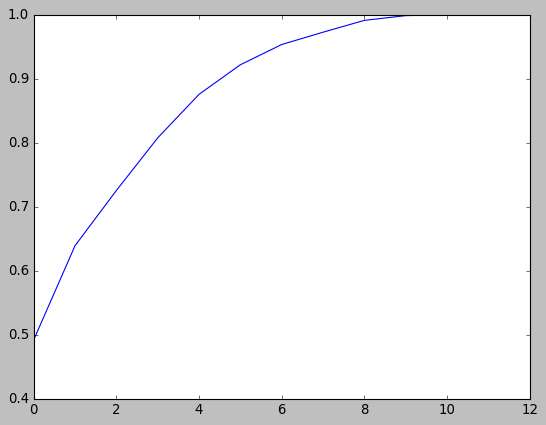

In [162]:
cu_explained_variance_ratio_=plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
cu_explained_variance_ratio_

# 4)Discussion of Results:
According to the decision tree model, the confusion matrix is showed. True positive is 29. False neagtive is 2. False positive is 0. Also, the true negative is 18. The accuracy is 0.9591836734693877, which is near to 1. It denotes.The resulted is similar to the expected result. 
According to the linear regression, 'cu_explained_variance_ratio_' creates the graph and the lines showed going to the upward and toward to right. It showed the high varience, which the highest position is near to 1. It means low bias and the prediction is similar to the target. However, the scatter plots have some problem in the linear regression part. 
Due to the data is not just only be incorrect in one class, need to be correct in both class, the decision tree doing the confusion matrix is well in this area. So the decision tree is the better model. 


# 5)Conclusion: 
In conclusion, the decision tree is simple to understand and interpret. Although the tree may create over complex trees and not generalized well when having many data nodes, the tree can handle bothe numerical and categorical data, and also multi-output problems. Besides that, in linear regression model, has more restructions. For instance, decision trees supports non-linearity but linear regression supports only linear solutions. So using the decision tree for doing the supervised learning problems. 

# 6)Reference: 

Acharya, M. S., Armaan, A., & Antony, A. S. (2019). A Comparison of Regression Models for Prediction of Graduate Admissions. IEEE Xplore. Available at: https://doi.org/10.1109/ICCIDS.2019.8862140 (Accessed: 26 April 2023)

ListenData. (n.d.). 15 Types of Regression in Data Science. ListenData. Avaliable at: https://www.listendata.com/2018/03/regression-analysis.html#id-627797 (Accessed: 23 April 2023)

Nanfack, G., Temple, P., & Frénay, B. (2022). Constraint Enforcement on Decision Trees: A Survey. ACM Computing Surveys, 54(10s), 1–36. Available at:https://doi.org/10.1145/3506734 (Accessed: 20 April 2023)

Pankaj. (2022). Pandas concat() Examples. DigitalOcean.Available at: https://www.digitalocean.com/community/tutorials/pandas-concat-examples. (Accessed:17 April 2023)

Python, R. (2023). Split Your Dataset With scikit-learn’s train_test_split(). realpython.com. Available at: https://realpython.com/train-test-split-python-data/ .(Accessed: 17 April 2023)

JavaTpoint.(n.d.).Regression vs Classification in Machine Learning Available at: www.javatpoint.com. https://www.javatpoint.com/regression-vs-classification-in-machine-learning (Accessed: 20 April 2023)

UCI(2019). UCI Machine Learning Repository: Algerian Forest Fires Dataset Data Set. 
Available at: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++.(Accessed: 20 April 2023)
